# A larger Linear Regression Sample

For this project we will be using the medical cost dataset.  

Site : https://www.kaggle.com/datasets/mirichoi0218/insurance








In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Lets Look at the types to understand which columns will need to be converted to numbers
print(insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
# Problem -- Want to know the relationship between ( age, sex, bmi, childre, smoker , region) and resykt charges ($)

# Preprocess the data
# Change sex, region and smoker to different datatypes
#    For sex create two columns make, femal3
#    One hot encoding -- a Categorical feature becomes an array whose size is the number of
#                        possible chocies
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [5]:
# Show the columsn of insurance_one_hot are all numeric
print(insurance_one_hot.dtypes)

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object


In [6]:
# Create X which will be the features.  Note Chareges is the Y value 
X = insurance_one_hot.drop("charges", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
# Create y which will be the dependent variable ( the result )
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
# Create a Train and Test Set very useful function
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42  )
len(X), '=' , len(X_train), '+' ,len(X_test), len(X_train) + len(X_test)

(1338, '=', 1070, '+', 268, 1338)

In [9]:
# Build a neural network
tf.random.set_seed(42)

# Build the model 
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, name="Chuck_hidden_Layer"),
  tf.keras.layers.Dense(1, name= "Chuck_Output_Layer")
])

# Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"])

# Fit the model
# Did not have to convert to tensors since a dataFrame is a Numpy Array.
# Tensorflow know how to handle NumPy
insurance_model.fit(X_train, y_train, epochs=100)

# Evaluate -- Doing better than the training set
# mae -- Oour model is wrong on average 7000 : Is that significant 
#  

print("\n********** Evaluating Data **********************")
print("Evaluating data")
insurance_model.evaluate(X_test, y_test)

# Let look at the mean/average 
# Our model is off very badly.  We might be chargin them 2,000 instead of 9000
y_train.median(), y_train.mean()

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7749 - mae: 7886.7749
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3882 - mae: 7748.3882
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

34/34 [==============================] - 0s 2ms/step - loss: 7273.8477 - mae: 7273.8477
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 7176.5205 - mae: 7176.5205
Epoch 83/100
34/34 [==============================] - 0s 990us/step - loss: 7425.6294 - mae: 7425.6294
Epoch 84/100
34/34 [==============================] - 0s 986us/step - loss: 7403.1294 - mae: 7403.1294
Epoch 85/100
34/34 [==============================] - 0s 995us/step - loss: 7356.0083 - mae: 7356.0083
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7484.7275 - mae: 7484.7275
Epoch 87/100
34/34 [==============================] - 0s 934us/step - loss: 7217.6089 - mae: 7217.6089
Epoch 88/100
34/34 [==============================] - 0s 999us/step - loss: 7260.9995 - mae: 7260.9995
Epoch 89/100
34/34 [==============================] - 0s 994us/step - loss: 7134.1562 - mae: 7134.1562
Epoch 90/100
34/34 [==============================] - 0s 959us/step - loss: 7083.4355 - mae:

(9575.4421, 13346.089736364485)

In [10]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Chuck_hidden_Layer (Dense)  (None, 10)                120       
                                                                 
 Chuck_Output_Layer (Dense)  (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


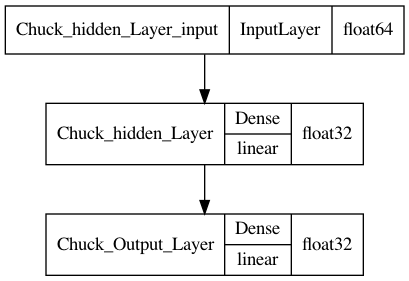

In [11]:
plot_model(insurance_model, show_dtype=True, show_layer_activations=True, show_layer_names=True )

In [12]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 1ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 5600.6660 - mae: 5600.6660
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 5523.6187 - mae: 5523.6187
Epo

In [13]:
# Try to improve out model -- 
#    1. Add an extra layer with more hidden units aud use the Adam improved the model by 30%
#    2. Train for longer. 200 epochs
# Cut the error rate by half

# When model.fit and loss is nan then your model may be to complex to learn anything

In [14]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.4961 - mae: 4924.4961


[4924.49609375, 4924.49609375]

In [15]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12749.5410 - mae: 12749.5410
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 10905.8164 - mae: 10905.8164
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

34/34 [==============================] - 0s 1ms/step - loss: 5834.3066 - mae: 5834.3066
Epoch 83/200
34/34 [==============================] - 0s 1ms/step - loss: 5805.8242 - mae: 5805.8242
Epoch 84/200
34/34 [==============================] - 0s 1ms/step - loss: 5772.3232 - mae: 5772.3232
Epoch 85/200
34/34 [==============================] - 0s 1ms/step - loss: 5745.1514 - mae: 5745.1514
Epoch 86/200
34/34 [==============================] - 0s 1ms/step - loss: 5711.3477 - mae: 5711.3477
Epoch 87/200
34/34 [==============================] - 0s 1ms/step - loss: 5674.5215 - mae: 5674.5215
Epoch 88/200
34/34 [==============================] - 0s 1ms/step - loss: 5639.4927 - mae: 5639.4927
Epoch 89/200
34/34 [==============================] - 0s 1ms/step - loss: 5600.6660 - mae: 5600.6660
Epoch 90/200
34/34 [==============================] - 0s 1ms/step - loss: 5559.4326 - mae: 5559.4326
Epoch 91/200
34/34 [==============================] - 0s 1ms/step - loss: 5523.6187 - mae: 5523.6187
Epo

34/34 [==============================] - 0s 1ms/step - loss: 3725.0789 - mae: 3725.0789
Epoch 163/200
34/34 [==============================] - 0s 1ms/step - loss: 3722.1680 - mae: 3722.1680
Epoch 164/200
34/34 [==============================] - 0s 1ms/step - loss: 3726.4907 - mae: 3726.4907
Epoch 165/200
34/34 [==============================] - 0s 1ms/step - loss: 3717.1111 - mae: 3717.1111
Epoch 166/200
34/34 [==============================] - 0s 1ms/step - loss: 3721.8940 - mae: 3721.8940
Epoch 167/200
34/34 [==============================] - 0s 1ms/step - loss: 3720.7312 - mae: 3720.7312
Epoch 168/200
34/34 [==============================] - 0s 1ms/step - loss: 3715.3096 - mae: 3715.3096
Epoch 169/200
34/34 [==============================] - 0s 1ms/step - loss: 3714.2400 - mae: 3714.2400
Epoch 170/200
34/34 [==============================] - 0s 1ms/step - loss: 3708.1538 - mae: 3708.1538
Epoch 171/200
34/34 [==============================] - 0s 1ms/step - loss: 3707.5681 - mae: 3707

In [16]:
insurance_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


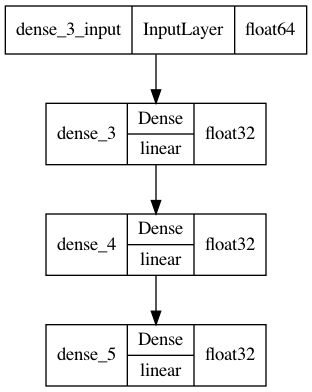

In [17]:
plot_model(insurance_model_3, show_dtype=True, show_layer_activations=True, show_layer_names=True )

9/9 [==============================] - 0s 1ms/step - loss: 3488.7861 - mae: 3488.7861


Text(0.5, 0, 'epochs')

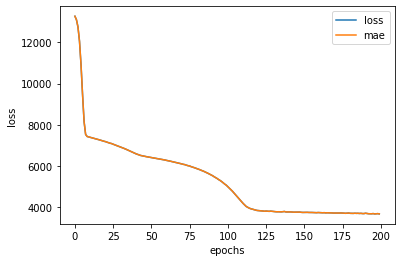

In [18]:
insurance_model_3.evaluate(X_test, y_test)

# Ploy history ( also know as a loss curve or a training curve )
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [19]:
# How long should you train for

# It depnends on the problem you are working on .  The solution is the early stopping callback which is a tensor flow 
# component that you can add to your model once a certain metric is improved


<AxesSubplot:ylabel='Frequency'>

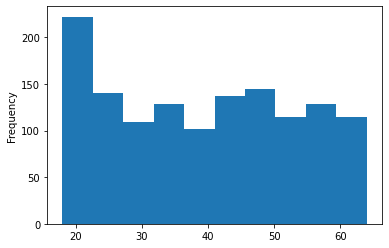

In [20]:
# Preprocessing Data 
# 1. Turn all data into numbers ( neural networks can't handle strings
# 2. Make sure all of your tensors are the right shape
# 3. Scale Features -- ( Normalize or standardize, neural networks perfer normalizaiton 

# normalization is to change the values of numeric columns in the dataset to a common scale without distorting 
# differneces in the range of values
#     Usually most of normalization will be built in.

# 

# Example in the X Dataframe is different fro both age amd bmi/
X["age"].plot(kind="hist")


<AxesSubplot:ylabel='Frequency'>

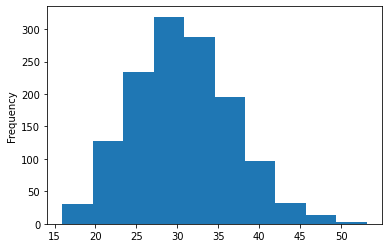

In [21]:
X["bmi"].plot(kind="hist")

In [22]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
# Feature Scaling
#
# Scaling Type : Scale ( also referrred as normalization)
# What it does : Convert all values to between 0 and 1 whilst preserving the original distribution
# Scikit-Learn Funciton -- MinMaxScaler
# When to use -- Use as default scaler with neural networks
#
# Scaling Type : Standarization 
# What it does : Remove the mean divides each value by the standard deviation 
# Scikit-Learn Function : StandardScalar
# When to use : Transform a feature to have close to normal distribution 
#  ( caution : this reduces the effect of outliers)
#
# In terms of scaling values, neural networks tend to prefere normalization
#
# A normal distribution is also know as a guassian
# 

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
from sklearn.compose         import make_column_transformer
from sklearn.preprocessing   import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column Transformer
# turn all values in the age, bmi, children between 0 and 1
# Don't need to scale the target variable
# One Hot Encode -- Ignore any but age, bmi, children
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), [ "sex", "smoker", "region"]))

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
# Random State is the same from tf.random.set_seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data and then use the fit column transformer to transform the test data
ct.fit(X_train)

# Transofrom training and test data with normalization with (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# Show the original and normalized repsentation of the data
print("Original Data -- \n", X_train.loc[0], "\n")
print("Normalized Data --  \n", X_train_normal[0], "\n")
print("Shape (Orignal Data)    = ", X_train.shape, "\n")
print("Shape (Normalized Data) = ", X_train_normal.shape, "\n")

Original Data -- 
 age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object 

Normalized Data --  
 [0.60869565 0.10734463 0.4        1.         0.         1.
 0.         0.         1.         0.         0.        ] 

Shape (Orignal Data)    =  (1070, 6) 

Shape (Normalized Data) =  (1070, 11) 



In [25]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model,
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

34/34 [==============================] - 0s 1ms/step - loss: 3676.9766 - mae: 3676.9766
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 3664.5757 - mae: 3664.5757
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 3660.3044 - mae: 3660.3044
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 3657.5134 - mae: 3657.5134
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 3655.2202 - mae: 3655.2202
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 3653.8831 - mae: 3653.8831
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 3652.0198 - mae: 3652.0198
Epo

In [26]:
# Evaluate our insruance model trained on normalized data
# Unnormalize data change is 4924.3477, 3438.7844. A reduction of 30%
# Normalization usually has models converge faster
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [27]:
insurance_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               1200      
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
